In [4]:
# change directory to 
%cd ~/Documents/cvprlab/

/Users/canali/Documents/cvprlab


In [22]:
print(image_paths)

['./MSRC_ObjCategImageDatabase_v2/Images/8_22_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/12_29_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/17_20_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/11_5_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/12_15_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/20_1_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/9_16_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/5_27_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/3_26_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/18_23_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/17_27_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/5_29_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/3_28_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/20_12_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/13_7_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/19_21_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/13_22_s.bmp', './MSRC_ObjCategImageDatabase_v2/Images/7_18_s.bmp', './MSRC_ObjCategImageDatabase_v2/Imag

In [5]:
# FEATURE EXTRACTION

import cv2
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
def extract_color_descriptor(img):
    # Compute the average red, green, and blue values as a basic color descriptor
    R = np.mean(img[:, :, 2])  # Note: OpenCV uses BGR format
    G = np.mean(img[:, :, 1])
    B = np.mean(img[:, :, 0])
    return np.array([R, G, B])

def extract_color_hist_descriptor(img, bin_number):
    red_hist, bins_red = np.histogram(img[:,:,2], bins=bin_number, range=(0,255))
    green_hist, bins_green = np.histogram(img[:,:,1], bins=bin_number, range=(0,255))
    blue_hist, bins_blue = np.histogram(img[:,:,0], bins=bin_number, range=(0,255))
    # plt.figure(figsize=(10, 5))

    # plt.subplot(3, 1, 1)
    # plt.bar(bins_red[:-1], red_hist, width=np.diff(bins_red), color='red', edgecolor='black', align='edge')


    # plt.subplot(3, 1, 2)
    # plt.bar(bins_green[:-1], green_hist, width=np.diff(bins_green), color='green', edgecolor='black', align='edge')


    # plt.subplot(3, 1, 3)
    # plt.bar(bins_blue[:-1], blue_hist, width=np.diff(bins_blue), color='blue', edgecolor='black', align='edge')

    # plt.tight_layout()
    # plt.show()
    return np.concatenate((red_hist, green_hist, blue_hist))
    # return np.array([red_hist,green_hist,blue_hist])
# Ex1: Download the Skeleton code and Dataset
DATASET_FOLDER = './MSRC_ObjCategImageDatabase_v2/Images/'  # Modify this path as needed
OUT_FOLDER = './python/descriptors/better_descriptors/'  # Modify this path as needed
if not os.path.exists(OUT_FOLDER):
    os.makedirs(OUT_FOLDER)
image_paths = glob.glob(DATASET_FOLDER + "*.bmp", recursive=True)

for image_path in image_paths:
    image = cv2.imread(image_path)
    #feature = extract_color_descriptor(image)
    feature = extract_color_hist_descriptor(image, 8)

    save_path = image_path.split('/')[-1].split('.')[0] + '.npy' # extract filename add .npy extension
    np.save(OUT_FOLDER + save_path, feature)

# Print results of Ex3: Display the filenames of the top 20 matching images
# print("Top 20 matching images:")
# for index in top_indices:
#     print(image_files[index])

# Ex4: Modify the Distance measure
# Here we can use Euclidean distance. For other measures modify this part accordingly.

# Ex5: Modify the Descriptor Computation
# The function extract_color_descriptor already computes a basic color descriptor.
# For enhancements, modify the extract_color_descriptor function.

# Ex6: (Optional) Modify the Descriptor to a Global Colour Histogram
# This step would involve modifying the extract_color_descriptor to calculate histograms.
# This is placeholder and needs actual implementation if required.


In [6]:
def calculate_distance(F1, F2):
    dist = np.linalg.norm(F1 - F2)
    return dist

In [88]:
import random

random_image = random.choice(image_paths)
image_name = random_image.split('/')[-1].split('.')[0]
FEATURES_FOLDER = './python/descriptors/better_descriptors/'
image_feature_path = FEATURES_FOLDER + image_name + '.npy'
image_feature = np.load(image_feature_path, allow_pickle=True)
features_paths = glob.glob(FEATURES_FOLDER + '*.npy', recursive=True)
similarity_list = []
for feature_path in features_paths:
    similarity_dict = {'image_name':'', 'dist':10000}
    name = feature_path.split('/')[-1].split('.')[0]
    F = np.load(feature_path)
    dist = calculate_distance(F, image_feature)
    similarity_dict['image_name'] = name + '.bmp'
    similarity_dict['dist'] = dist
    similarity_list.append(similarity_dict)

sorted_list = sorted(similarity_list, key=lambda dist: dist['dist'])

In [ ]:
import json
# Calculate precision
rgb_to_index = {
    (0, 0, 0): 0,         # void
    (128, 0, 0): 1,       # building
    (0, 128, 0): 2,       # grass
    (128, 128, 0): 3,     # tree
    (0, 0, 128): 4,       # cow
    (128, 0, 128): 5,     # horse
    (0, 128, 128): 6,     # sheep
    (128, 128, 128): 7,   # sky
    (64, 0, 0): 8,        # mountain
    (192, 0, 0): 9,       # aeroplane
    (64, 128, 0): 10,     # water
    (192, 128, 0): 11,    # face
    (64, 0, 128): 12,     # car
    (192, 0, 128): 13,    # bicycle
    (64, 128, 128): 14,   # flower
    (192, 128, 128): 15,  # sign
    (0, 64, 0): 16,       # bird
    (128, 64, 0): 17,     # book
    (0, 192, 0): 18,      # chair
    (128, 64, 128): 19,   # road
    (0, 192, 128): 20,    # cat
    (128, 192, 128): 21,  # dog
    (64, 64, 0): 22,      # body
    (192, 64, 0): 23      # boat
}
index_to_class_name = {
    0: "void",
    1: "building",
    2: "grass",
    3: "tree",
    4: "cow",
    5: "horse",
    6: "sheep",
    7: "sky",
    8: "mountain",
    9: "aeroplane",
    10: "water",
    11: "face",
    12: "car",
    13: "bicycle",
    14: "flower",
    15: "sign",
    16: "bird",
    17: "book",
    18: "chair",
    19: "road",
    20: "cat",
    21: "dog",
    22: "body",
    23: "boat"
}
def get_class_vector(img):
    class_vector = np.zeros(24)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_value = tuple(img[i, j])
            pixel_index = rgb_to_index[pixel_value]
            class_vector[pixel_index] += 1
    class_vector = class_vector/class_vector.sum() # normalize class vector
    return class_vector
    
GROUND_TRUTH_FOLDER = './MSRC_ObjCategImageDatabase_v2/GroundTruth/'
LABELS_FOLDER = './MSRC_ObjCategImageDatabase_v2/labels/'
label_image_paths = glob.glob(GROUND_TRUTH_FOLDER + '*.bmp')
classes_dict = {}
for label_image_path in label_image_paths:
    label_dict = {}
    label_image = cv2.imread(label_image_path)
    label_image = cv2.cvtColor(label_image, cv2.COLOR_RGB2BGR)
    name = label_image_path.split('/')[-1].split('.')[0]
    class_vector = get_class_vector(label_image)
    for i in range(len(class_vector)):
        label_dict[index_to_class_name[i]] = class_vector[i]
    with open(LABELS_FOLDER + name + '.json', 'w') as outfile:
        json.dump(label_dict, outfile)

In [83]:
def calculate_precision_recall_multi(query_class_proportions, retrieved_images):
    # Initialize cumulative proportions for each class
    cumulative_retrieved_proportions = {}
    precision_per_class = {}
    recall_per_class = {}

    # Sum the proportions of each class over all retrieved images
    for image in retrieved_images:
        for class_label, proportion in image.items():
            if class_label in cumulative_retrieved_proportions:
                cumulative_retrieved_proportions[class_label] += proportion
            else:
                cumulative_retrieved_proportions[class_label] = proportion

    # Calculate precision and recall for each class
    for class_label, query_proportion in query_class_proportions.items():
        retrieved_proportion = cumulative_retrieved_proportions.get(class_label, 0)

        # Precision for this class
        precision_per_class[class_label] = min(retrieved_proportion, query_proportion) / max(retrieved_proportion, 1e-6)
        
        # Recall for this class
        recall_per_class[class_label] = min(retrieved_proportion, query_proportion) / query_proportion

    return precision_per_class, recall_per_class

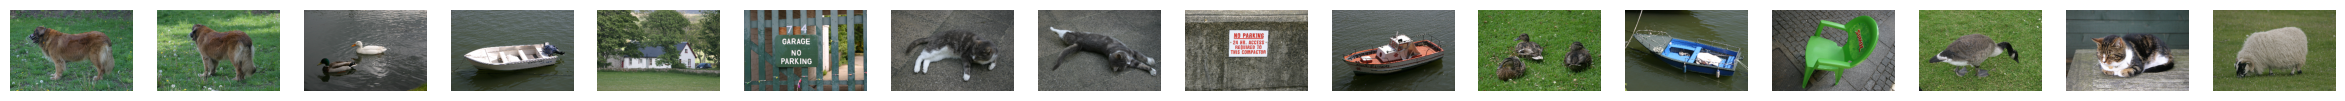

In [89]:
import matplotlib.pyplot as plt
top_15 = sorted_list[0:16]
f, axarr = plt.subplots(1, 16, figsize=(30, 15)) 

# Left-most image is the query image
i = 0
query_label = {}
search_labels = []
for image_dict in top_15:
    
    label_path = LABELS_FOLDER + image_dict['image_name'].split('.')[0] + '_GT.json'
    with open(label_path) as json_file:
        data = json.load(json_file)
        class_vector = list(data.values())

        if i == 0:
            for j in range(23):
                if class_vector[j] != 0:
                    query_label[index_to_class_name[j]]= class_vector[j]
            # query_label = list(data.values())
        else:
            label_dict = {}
            for j in range(23):
                if class_vector[j] != 0:
                    label_dict[index_to_class_name[j]]= class_vector[j]
            search_labels.append(label_dict)
        # dist = calculate_distance(np.array(query_label), np.array(class_vector)) labels distance

        
        image_path = DATASET_FOLDER + image_dict['image_name']
        img = cv2.imread(image_path)  # Load the image
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        axarr[i].imshow(img)  # Display the image
        axarr[i].axis('off')  # Turn off axis if you don't want the grid lines
        i+=1
plt.show()

In [ ]:
query_label

In [90]:
precision, recall = calculate_precision_recall_multi(query_label, search_labels)

{'void': 0.07666153642095222,
 'grass': 0.0896512692650447,
 'tree': 0.01565636698824168,
 'face': 0.006830320609860467,
 'flower': 0.0,
 'body': 0.10466510565563147}

In [91]:
print(precision, recall)

{'void': 0.0358696810036136, 'grass': 0.20508321039418176, 'dog': 1.0} {'void': 1.0, 'grass': 1.0, 'dog': 0.9139290407358738}


In [ ]:
 
img=cv2.drawKeypoints(gray,kp,img)
 
cv2.imwrite('./sift_test.jpg',img)

In [73]:
kp

< cv2.KeyPoint 0x160535560>

KeyboardInterrupt: 

In [75]:
sorted_list

[{'image_name': '19_10_s.bmp', 'dist': 0.0},
 {'image_name': '3_7_s.bmp', 'dist': 15573.051146130612},
 {'image_name': '16_26_s.bmp', 'dist': 15795.049604227268},
 {'image_name': '9_17_s.bmp', 'dist': 17251.64108135803},
 {'image_name': '17_3_s.bmp', 'dist': 17591.441555483736},
 {'image_name': '14_5_s.bmp', 'dist': 18149.824351767154},
 {'image_name': '12_30_s.bmp', 'dist': 18827.548326853394},
 {'image_name': '14_16_s.bmp', 'dist': 19259.691482471884},
 {'image_name': '19_21_s.bmp', 'dist': 19316.031942404734},
 {'image_name': '16_27_s.bmp', 'dist': 20038.033336632616},
 {'image_name': '6_29_s.bmp', 'dist': 20551.834516655686},
 {'image_name': '9_28_s.bmp', 'dist': 20906.462206695804},
 {'image_name': '11_26_s.bmp', 'dist': 20911.152383357545},
 {'image_name': '4_24_s.bmp', 'dist': 21685.30769899288},
 {'image_name': '6_2_s.bmp', 'dist': 21855.018142294004},
 {'image_name': '18_24_s.bmp', 'dist': 22102.10053365969},
 {'image_name': '12_12_s.bmp', 'dist': 22116.21875457014},
 {'image_

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming top_15 is a list of dictionaries with 'image_name' as a key
top_15 = sorted_list[1:16]

# Increase the figure size for larger images
f, axarr = plt.subplots(1, 15, figsize=(45, 5))  # Adjust as needed

for i, image_dict in enumerate(top_15):
    image_path = DATASET_FOLDER + image_dict['image_name']
    img = mpimg.imread(image_path)  # Load the image
    axarr[i].imshow(img)  # Display the image
    axarr[i].axis('off')  # Turn off axis grid lines
    
    # Label the first image as "Query Image"
    if i == 0:
        axarr[i].set_title("Query Image", fontsize=16)
    else:
        # Label the other images as 1, 2, 3, ..., 15
        axarr[i].set_title(f"{i}", fontsize=16)

plt.tight_layout()  # Adjust layout so images don't overlap
plt.show()


In [ ]:
import cv2
img = cv2.imread('./MSRC_ObjCategImageDatabase_v2/Images/3_17_s.bmp')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
 
img=cv2.drawKeypoints(gray,kp,img)
 
cv2.imwrite('./sift_test.jpg',img)